# Vision Investment Rental Worthiness Calculator.

In [2]:
import numpy as np
import sklearn 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
%matplotlib inline

C:\Users\Rakshith\Miniconda3\envs\machinelearning\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
train = pd.read_excel("datasets/accepted.xlsx")

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
Row Number                               500 non-null int64
Fico Score                               500 non-null int64
Length of Employment (Months)            500 non-null int64
Length of Current Residency  (Months)    500 non-null int64
Monthly Income                           500 non-null int64
Debt to Income percentage                500 non-null float64
Outcome                                  499 non-null float64
dtypes: float64(2), int64(5)
memory usage: 27.4 KB


In [8]:
train.describe()

,Row Number,Fico Score,Length of Employment (Months),Length of Current Residency (Months),Monthly Income,Debt to Income percentage,Outcome
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,499.000000
mean,249.500000,600.426000,28.480000,17.748000,6071.712000,50.765068,0.613226
std,144.481833,142.445646,18.182376,10.490978,2220.193042,28.560121,0.487500
min,0.000000,354.000000,0.000000,0.000000,2002.000000,0.188483,0.000000
25%,124.750000,473.750000,12.000000,8.000000,4271.500000,25.234707,0.000000
50%,249.500000,599.500000,28.000000,19.000000,6084.000000,49.827397,1.000000
75%,374.250000,728.250000,44.000000,27.000000,7997.250000,76.082181,1.000000
max,499.000000,849.000000,59.000000,35.000000,9983.000000,99.708689,1.000000


In [9]:
train.head()

,Row Number,Fico Score,Length of Employment (Months),Length of Current Residency (Months),Monthly Income,Debt to Income percentage,Outcome
0,0,593,56,7,7920,50.313829,1.0
1,1,744,34,11,8748,24.693483,1.0
2,2,845,57,29,5582,79.617316,0.0
3,3,624,23,21,2418,81.520067,0.0
4,4,832,35,5,6637,85.491807,0.0


In [13]:
train.Outcome.value_counts()

1.0    306
0.0    193
Name: Outcome, dtype: int64

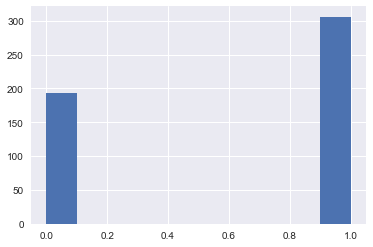

In [15]:
train.Outcome.loc[:,].hist()